# Model
Attempt to design a model describing consultation rate, patient registration, and doctors:

$$\frac{dC}{dt} = \alpha D P$$
$$\frac{dP}{dt} = \beta (1 - \frac{P}{K}) P$$
$$\frac{dD}{dt} = 0$$

where C = number of consultations, P = number of patients, D = number of doctors, $\alpha$ = interaction/consultation rate, $\beta$ = patient registration rate.

The Patient compartment is the Logistic Equation since we know the ceiling (K=5646).
The Doctor compartment is constant (no change, zero).
The Consultation compartment is a simple interaction between the doctors and patients with $\alpha$ as the growth rate(?).

In [1]:
import numpy as np
import pandas as pd 

In [2]:
# The model
def get_model(alpha, beta, K):
    def model(t, y):
        C, P, D = y
        dCdt = alpha * D * P 
        dPdt = beta * (1 - P / K) * P 
        dDdt = 0

        return np.array([dCdt, dPdt, dDdt])
    return model

In [3]:
# Runge-Kutta 4th order
def rk4(f, h, t0, y0):
    k1 = f(t0, y0)
    k2 = f(t0 + h/2, y0 + h * k1/2)
    k3 = f(t0 + h/2, y0 + h * k2/2)
    k4 = f(t0 + h, y0 + h * k3)
    return y0 + 1/6 * h * (k1 + 2*k2 + 2*k3 + k4)

In [4]:
# Sample simulation 
model = get_model(alpha=0.0002, beta=0.05, K=5646)
cpd_storage = pd.DataFrame(columns=['consultations', 'patients', 'doctors'])
h = 1 # step size

c = 0 # 0 consultations
p = 1 # 1 patient
d = 17 # 17 doctors 
cpd = [c, p, d]

tn = 523 # 523 days from June 1, 2022 is November 15, 2023, end of contract
t = 0
time = []

while t <= tn: 
    time.append(t)
    cpd_storage.at[t] = cpd
    cpd = rk4(model, h, t, cpd)
    t += h

cpd_storage

,consultations,patients,doctors
0,0,1,17
1,0.003486,1.051262,17.0
2,0.007152,1.10515,17.0
3,0.011005,1.161801,17.0
4,0.015055,1.221355,17.0
...,...,...,...
519,6646.29167,5645.999829,17.0
520,6665.48807,5645.999837,17.0
521,6684.684469,5645.999845,17.0
522,6703.880869,5645.999853,17.0


<AxesSubplot: >

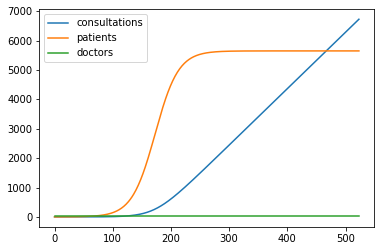

In [5]:
cpd_storage.plot()

## Next steps:

- Curve fitting 
- Projections